In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud

In [2]:
df = pd.read_csv('eng_french.csv')

# Replace non-breaking spaces with regular spaces
df.replace('\u202F', ' ', regex=True, inplace=True)

df.head()

,English words/sentences,French words/sentences
0,Hi.,Salut!
1,Run!,Cours !
2,Run!,Courez !
3,Who?,Qui ?
4,Wow!,Ça alors !


In [3]:
df.describe()

,English words/sentences,French words/sentences
count,175621,175621
unique,123100,165710
top,I can't tell you how happy I am that you've co...,Comment cela se peut-il ?
freq,32,9


In [4]:
# Separating the English and French datasets
eng = df['English words/sentences']
fra = df['French words/sentences']

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/raghavendrachitroju/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


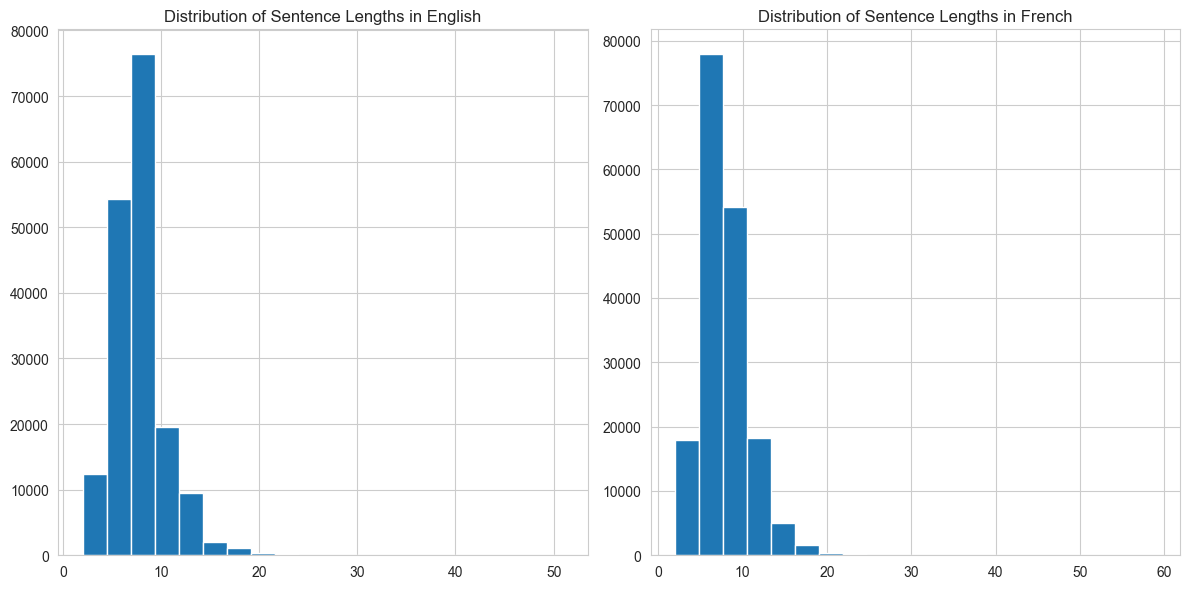

Most Common English words: [('.', 146892), ('I', 62369), ('you', 41077), ('to', 39059), ('?', 29064), ('the', 28621), ('a', 24320), ("n't", 24125), ('is', 16826), ('do', 16004)]
Most Common French words: [('.', 142508), ('de', 36253), ('Je', 34981), ('?', 29083), ('pas', 28669), ('que', 24770), ('à', 21600), ('ne', 18979), ('la', 17435), ('le', 17168)]
English Diversity (Type-Token Ratio): 0.012184542231641386
French Diversity (Type-Token Ratio): 0.02339227246844453


In [2]:
import pandas as pd
import nltk
from collections import Counter
import matplotlib.pyplot as plt

# Make sure to download the NLTK book collection datasets
import os
import ssl

# This part is required to ensure that Python can access the SSL certificates on MacOS
if (not os.environ.get('PYTHONHTTPSVERIFY', '') and
        getattr(ssl, '_create_unverified_context', None)): 
    ssl._create_default_https_context = ssl._create_unverified_context

# Now you can download the NLTK data
nltk.download('punkt')


# Load the dataset
df = pd.read_csv('eng_french.csv')

# Tokenize the sentences into words
df['English_tokens'] = df['English words/sentences'].apply(nltk.word_tokenize)
df['French_tokens'] = df['French words/sentences'].apply(nltk.word_tokenize)

# Get the frequency distribution for English and French
english_freq = Counter(token for sentence in df['English_tokens'] for token in sentence)
french_freq = Counter(token for sentence in df['French_tokens'] for token in sentence)

# Find the most common words in English and French
most_common_english = english_freq.most_common(10)
most_common_french = french_freq.most_common(10)

# Calculate type-token ratio for diversity
english_diversity = len(set(english_freq)) / sum(english_freq.values())
french_diversity = len(set(french_freq)) / sum(french_freq.values())

# Plot the distribution of sentence lengths
english_sentence_lengths = df['English_tokens'].apply(len)
french_sentence_lengths = df['French_tokens'].apply(len)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
english_sentence_lengths.hist(bins=20)
plt.title('Distribution of Sentence Lengths in English')

plt.subplot(1, 2, 2)
french_sentence_lengths.hist(bins=20)
plt.title('Distribution of Sentence Lengths in French')

plt.tight_layout()
plt.show()

print("Most Common English words:", most_common_english)
print("Most Common French words:", most_common_french)
print("English Diversity (Type-Token Ratio):", english_diversity)
print("French Diversity (Type-Token Ratio):", french_diversity)


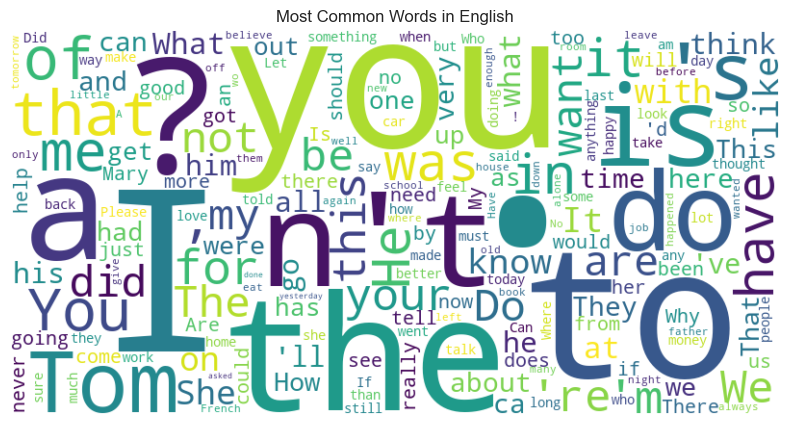

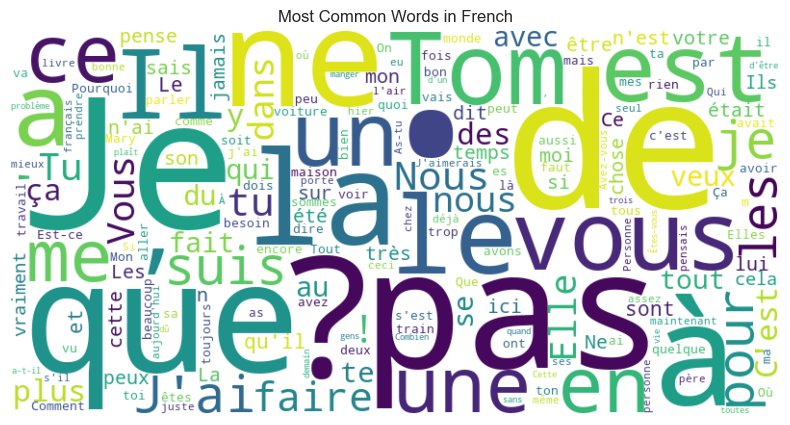

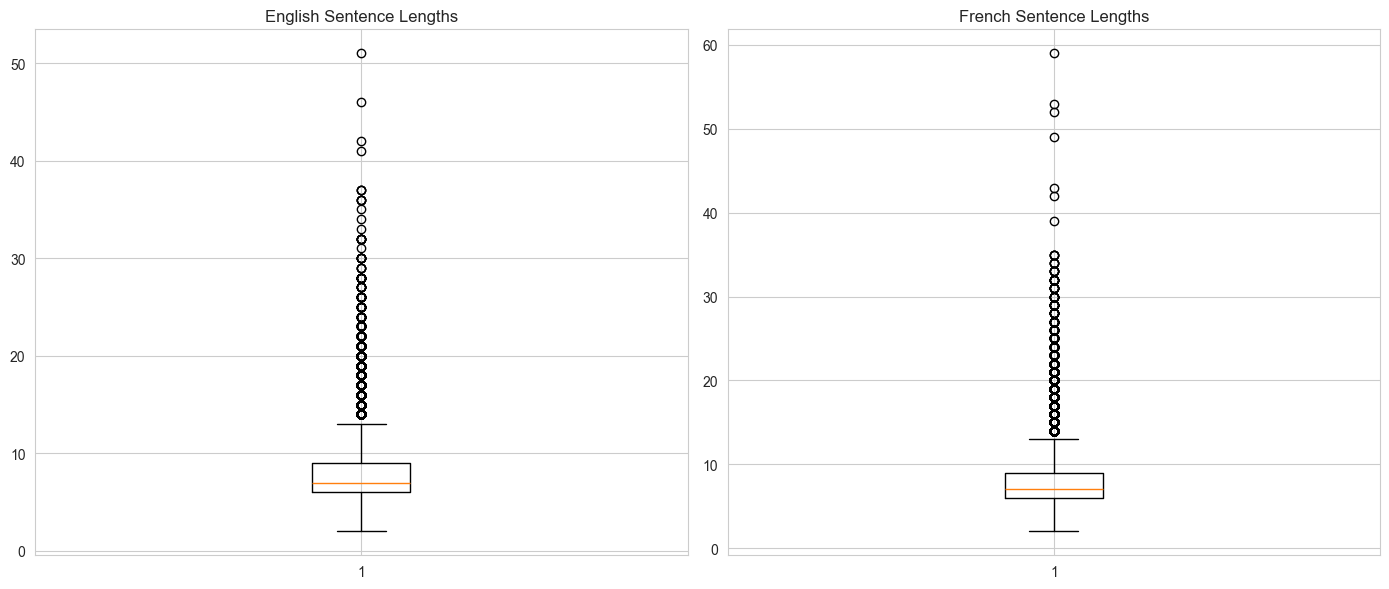

Most Common English Bigrams: [(('.', 'I'), 49266), (('.', 'You'), 10330), (('.', 'Tom'), 9951), (('.', 'He'), 9637), (('I', "'m"), 7883), (('do', "n't"), 7502), (('.', 'We'), 6940), (('.', 'The'), 6223), (('.', 'It'), 5565), (('.', 'She'), 5527)]
Most Common French Bigrams: [(('.', 'Je'), 34506), (('.', 'Il'), 13748), (('.', 'Tom'), 9671), (('Je', 'ne'), 7229), (('.', "J'ai"), 7188), (('.', 'Nous'), 6194), (('.', 'Elle'), 5315), (('.', 'Tu'), 4780), (('.', "C'est"), 4673), (('.', 'Vous'), 4639)]


In [3]:
from wordcloud import WordCloud

# Function to plot word clouds for top words
def plot_word_cloud(frequency_dist, title):
    wordcloud = WordCloud(width=800, height=400, background_color ='white').generate_from_frequencies(frequency_dist)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Plot word clouds for both English and French
plot_word_cloud(english_freq, 'Most Common Words in English')
plot_word_cloud(french_freq, 'Most Common Words in French')

# Compare sentence length distributions
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.boxplot(english_sentence_lengths)
plt.title('English Sentence Lengths')

plt.subplot(1, 2, 2)
plt.boxplot(french_sentence_lengths)
plt.title('French Sentence Lengths')

plt.tight_layout()
plt.show()

# Bigram analysis for both languages
english_bigrams = Counter(nltk.bigrams(token for sentence in df['English_tokens'] for token in sentence))
french_bigrams = Counter(nltk.bigrams(token for sentence in df['French_tokens'] for token in sentence))

print("Most Common English Bigrams:", english_bigrams.most_common(10))
print("Most Common French Bigrams:", french_bigrams.most_common(10))


In [42]:
eng_word_counter = Counter([word for sentence in eng for word in sentence.split()])
print("Total count of English words:",len([word for sentence in eng for word in sentence.split()]))
print("Count of distinct English words:",len(eng_word_counter))
print("10 most common English words:",list(zip(*eng_word_counter.most_common(10)))[0])

Total count of English words: 1082098
Count of distinct English words: 27393
10 most common English words: ('I', 'to', 'you', 'the', 'a', 'is', 'Tom', 'of', 'in', 'have')


In [43]:
fra_word_counter = Counter([word for sentence in fra for word in sentence.split()])
print("Total count of French words:",len([word for sentence in fra for word in sentence.split()]))
print("Count of distinct French words:",len(fra_word_counter))
print("10 most common French words:",list(zip(*fra_word_counter.most_common(10)))[0])

Total count of French words: 1177832
Count of distinct French words: 44918
10 most common French words: ('de', 'Je', '?', 'pas', 'que', 'à', 'ne', 'la', 'le', 'Il')


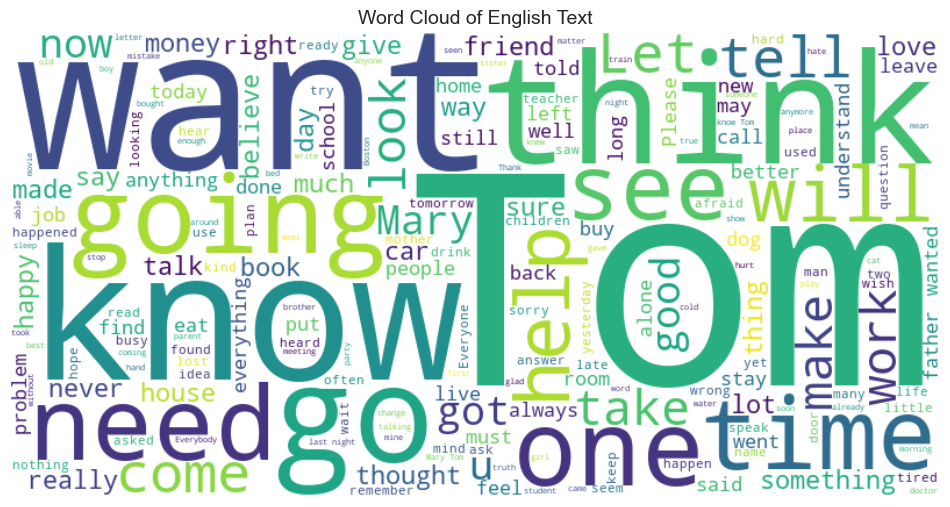

In [44]:
# Sample text - replace 'eng' with your actual text
text = ' '.join(eng)

# Create a word cloud
plt.figure(figsize=(12, 8))
wc = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

# Display the word cloud
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')  # Remove the axes
plt.title('Word Cloud of English Text', fontsize=14)  # Add a title
plt.show()

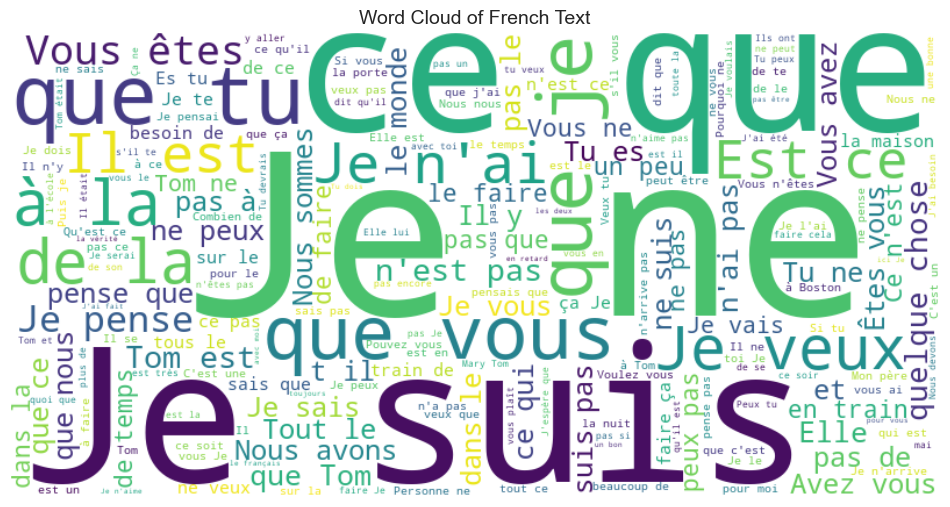

In [31]:
# Sample text - replace 'eng' with your actual text
text = ' '.join(fra)

# Create a word cloud
plt.figure(figsize=(12, 8))
wc = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

# Display the word cloud
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')  # Remove the axes
plt.title('Word Cloud of French Text', fontsize=14)  # Add a title
plt.show()

In [32]:
def word_count(line):
  return len(line.split())

In [33]:
df['English_word_count'] = df['English words/sentences'].apply(lambda x: word_count(x))
df['French_word_count'] = df['French words/sentences'].apply(lambda x: word_count(x))

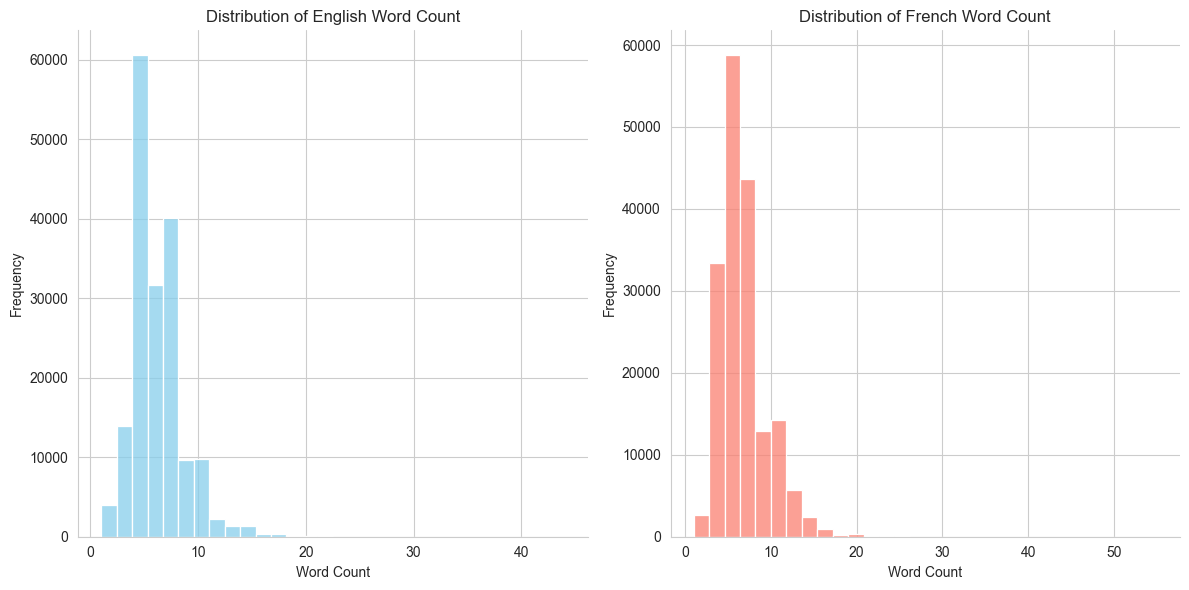

In [35]:
# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plotting English word count distribution
sns.histplot(df['English_word_count'], ax=axes[0], color='skyblue', bins=30)
axes[0].set_title('Distribution of English Word Count')
axes[0].set_xlabel('Word Count')
axes[0].set_ylabel('Frequency')

# Plotting French word count distribution
sns.histplot(df['French_word_count'], ax=axes[1], color='salmon', bins=30)
axes[1].set_title('Distribution of French Word Count')
axes[1].set_xlabel('Word Count')
axes[1].set_ylabel('Frequency')

# Improve the layout and display the plot
plt.tight_layout()
sns.despine()
plt.show()

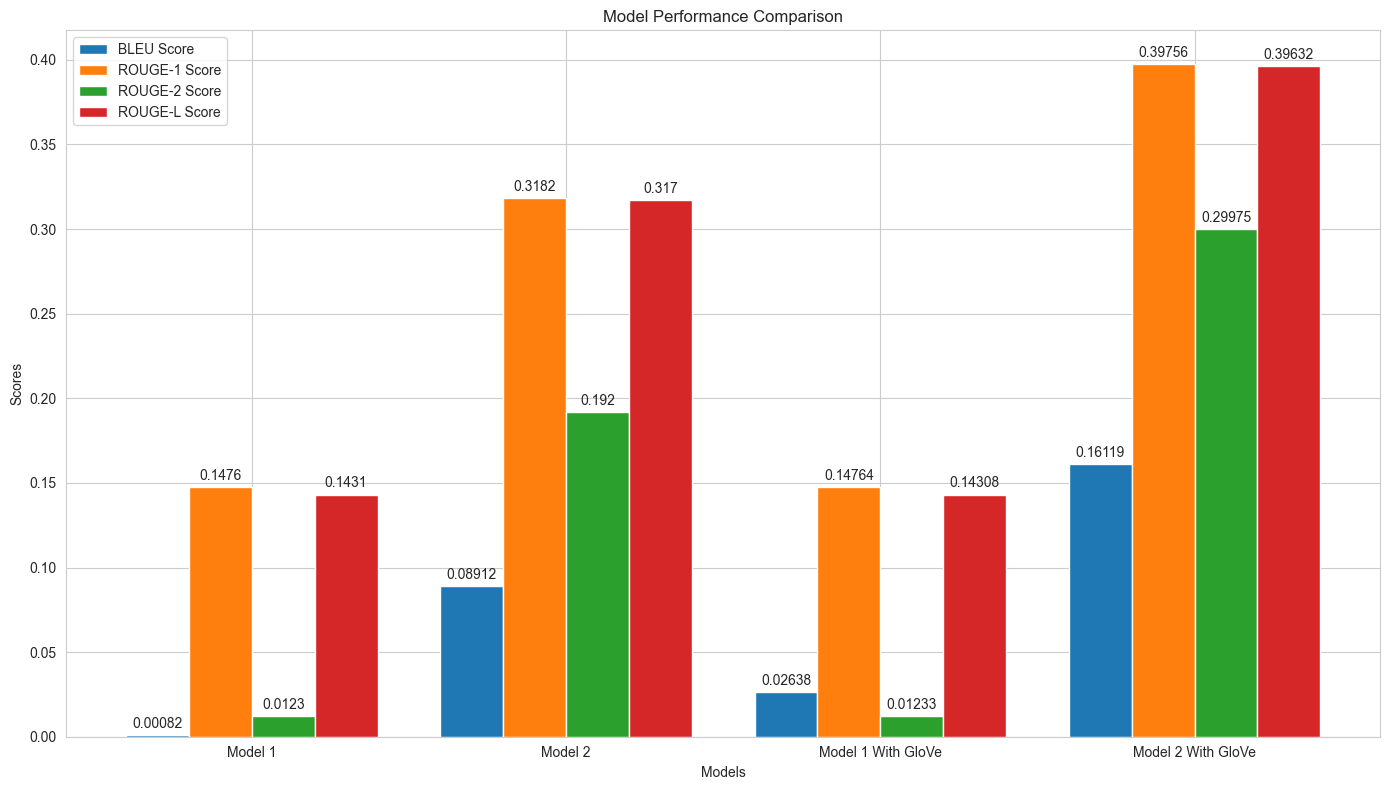

In [3]:
### Metrics comparision
# Define new colors for each set of bars
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
import matplotlib.pyplot as plt
import numpy as np

# Data for model performances
models = ['Model 1', 'Model 2', 'Model 1 With GloVe', 'Model 2 With GloVe']
bleu_scores = [0.00082, 0.08912, 0.02638, 0.16119]
rouge_1_scores = [0.14760, 0.31820, 0.14764, 0.39756]
rouge_2_scores = [0.01230, 0.19200, 0.01233, 0.29975]
rouge_l_scores = [0.14310, 0.31700, 0.14308, 0.39632]

x = np.arange(len(models))  # the label locations
width = 0.2  # the width of the bars


# Attach a text label above each bar in rects, displaying its height.
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

fig, ax = plt.subplots(figsize=(14, 8))
rects1 = ax.bar(x - 3*width/2, bleu_scores, width, label='BLEU Score', color=colors[0])
rects2 = ax.bar(x - width/2, rouge_1_scores, width, label='ROUGE-1 Score', color=colors[1])
rects3 = ax.bar(x + width/2, rouge_2_scores, width, label='ROUGE-2 Score', color=colors[2])
rects4 = ax.bar(x + 3*width/2, rouge_l_scores, width, label='ROUGE-L Score', color=colors[3])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

fig.tight_layout()

plt.show()
